In [ ]:
!python -m pip install citipy

# WeatherPy
----

### Analysis
* Temperature increases as you get closer to the equator (zero degrees latitude), but there were two outliers at the time I ran this that were at 20 degrees and -20 degrees latitude that had the highest temperatures of the entire dataset.
* Cloudiness and humidity levels appear to be linked, but latitude does not appear to be a facor.
* Most wind speeds were below 10 mph at the time the data was pulled.  Latitude did not appear to be a factor.
* It would be interesting to see how axial tilt might effect these readings. Taking measurements at the solstices and the equinoxes would make an interesting comparison


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print(city_count)

610


In [3]:
#make lists of info needed for DF later
latitude = []
temperature = []
cloudiness = []
wind_speed = []
country = []
date = []
humidity = []
longitude = []
city_name = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="


In [6]:
n=1

print("Beginning data retrieval")
print("-----------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city + "&units=Imperial").json()
        time.sleep(1.1)
        print(f"Processing record {n} of {city_count}: {city}.")
        n=n+1
                  
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        city_name.append(response['name'])

    except KeyError: print("City cannot be found...")


Beginning data retrieval
-----------------------------
Processing record 1 of 610: busselton.
Processing record 2 of 610: lebu.
Processing record 3 of 610: mataura.
Processing record 4 of 610: jamestown.
Processing record 5 of 610: bambous virieux.
Processing record 6 of 610: coari.
Processing record 7 of 610: ushuaia.
Processing record 8 of 610: san patricio.
Processing record 9 of 610: angoche.
Processing record 10 of 610: kachug.
Processing record 11 of 610: kapaa.
Processing record 12 of 610: windhoek.
Processing record 13 of 610: caudebec-les-elbeuf.
Processing record 14 of 610: najran.
Processing record 15 of 610: kavieng.
Processing record 16 of 610: baherden.
Processing record 17 of 610: lahaina.
Processing record 18 of 610: port alfred.
Processing record 19 of 610: melilla.
Processing record 20 of 610: mayumba.
Processing record 21 of 610: mys shmidta.
City cannot be found...
Processing record 22 of 610: simbahan.
Processing record 23 of 610: mehamn.
Processing record 24 of 61

Processing record 193 of 610: haileybury.
Processing record 194 of 610: ende.
Processing record 195 of 610: kalmunai.
Processing record 196 of 610: taltal.
Processing record 197 of 610: alofi.
Processing record 198 of 610: dunedin.
Processing record 199 of 610: kangaatsiaq.
Processing record 200 of 610: grand river south east.
City cannot be found...
Processing record 201 of 610: kodiak.
Processing record 202 of 610: mana.
Processing record 203 of 610: serro.
Processing record 204 of 610: venado tuerto.
Processing record 205 of 610: abhar.
Processing record 206 of 610: moyale.
Processing record 207 of 610: zhigansk.
Processing record 208 of 610: kyabe.
Processing record 209 of 610: ritchie.
Processing record 210 of 610: richards bay.
Processing record 211 of 610: pacific grove.
Processing record 212 of 610: sur.
Processing record 213 of 610: vaitupu.
City cannot be found...
Processing record 214 of 610: bathsheba.
Processing record 215 of 610: freeport.
Processing record 216 of 610: th

Processing record 384 of 610: ardistan.
City cannot be found...
Processing record 385 of 610: elko.
Processing record 386 of 610: goundam.
Processing record 387 of 610: sioux lookout.
Processing record 388 of 610: harper.
Processing record 389 of 610: atambua.
Processing record 390 of 610: hofn.
Processing record 391 of 610: yerofey pavlovich.
Processing record 392 of 610: yoichi.
Processing record 393 of 610: manaus.
Processing record 394 of 610: atar.
Processing record 395 of 610: aden.
Processing record 396 of 610: san quintin.
Processing record 397 of 610: hamilton.
Processing record 398 of 610: la palma.
Processing record 399 of 610: galle.
Processing record 400 of 610: ngukurr.
City cannot be found...
Processing record 401 of 610: sao gabriel da cachoeira.
Processing record 402 of 610: tommot.
Processing record 403 of 610: ahipara.
Processing record 404 of 610: ugoofaaru.
Processing record 405 of 610: ust-ilimsk.
Processing record 406 of 610: esil.
Processing record 407 of 610: s

Processing record 576 of 610: marche-en-famenne.
Processing record 577 of 610: leshukonskoye.
Processing record 578 of 610: bereda.
Processing record 579 of 610: goderich.
Processing record 580 of 610: verkhnevilyuysk.
Processing record 581 of 610: deer lake.
Processing record 582 of 610: vanimo.
Processing record 583 of 610: kostroma.
Processing record 584 of 610: oktyabrskoye.
Processing record 585 of 610: chany.
Processing record 586 of 610: atherton.
Processing record 587 of 610: santa ines.
Processing record 588 of 610: acandi.
Processing record 589 of 610: bosilegrad.
Processing record 590 of 610: wangqing.
Processing record 591 of 610: tortoli.
Processing record 592 of 610: nabire.
Processing record 593 of 610: ovre ardal.
Processing record 594 of 610: temaraia.
City cannot be found...
Processing record 595 of 610: khonuu.
City cannot be found...
Processing record 596 of 610: borlange.
City cannot be found...
Processing record 597 of 610: kaeo.
Processing record 598 of 610: bom 

{'coord': {'lon': 34.56, 'lat': 45.05},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 55.76,
  'pressure': 1005.91,
  'humidity': 92,
  'temp_min': 55.76,
  'temp_max': 55.76,
  'sea_level': 1037.04,
  'grnd_level': 1005.91},
 'wind': {'speed': 8.01, 'deg': 195},
 'clouds': {'all': 0},
 'dt': 1540705459,
 'sys': {'message': 0.1737,
  'country': 'UA',
  'sunrise': 1540700084,
  'sunset': 1540737338},
 'id': 712587,
 'name': 'Novikovo',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame({"City":city_name, 
                           "Cloudiness":cloudiness,
                           "Country":country,
                           "Date":date,
                           "Humidity":humidity,
                           "Lat":latitude,
                           "Lng":longitude,
                           "Max Temp":temperature,
                           "Cloudiness":cloudiness,
                           "Wind Speed":wind_speed})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,0,AU,1540704514,83,-33.64,115.35,69.57,5.44
1,Lebu,0,ET,1540704515,64,8.96,38.73,60.80,1.97
2,Mataura,92,NZ,1540704516,100,-46.19,168.86,49.28,2.98
3,Jamestown,80,AU,1540704462,100,-33.21,138.60,60.53,5.77
4,Bambous Virieux,20,MU,1540702800,57,-20.34,57.76,78.80,8.05


In [9]:
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

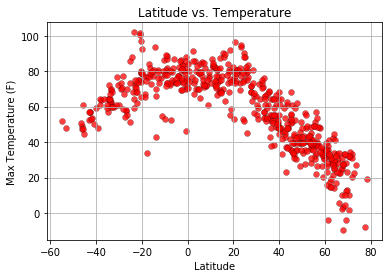

In [10]:
plt.scatter(latitude, temperature, marker = "o", facecolors = "red", edgecolors = "black", 
                    linewidths = .25, alpha = .75)

# graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#### Latitude vs. Humidity Plot

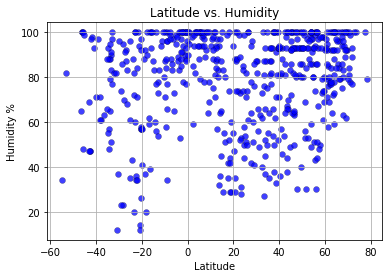

In [11]:
plt.scatter(latitude, humidity, marker = "o", facecolors = "blue", edgecolors = "black", 
                    linewidths = .25, alpha = .75)

# graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()

#### Latitude vs. Cloudiness Plot

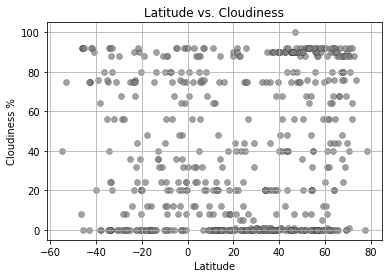

In [12]:
plt.scatter(latitude, cloudiness, marker = "o", facecolors = "grey", edgecolors = "black", 
                    linewidths = .25, alpha = .75)

# graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()

#### Latitude vs. Wind Speed Plot

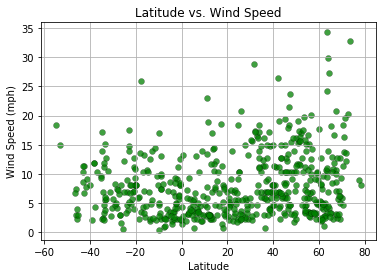

In [13]:
plt.scatter(latitude, wind_speed, marker = "o", facecolors = "green", edgecolors = "black", 
                    linewidths = .25, alpha = .75)

# graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()